29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Время обучения модели с 2 слоями: 44.48 секунд
Время обучения модели с 4 слоями: 48.37 секунд
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8889 - loss: 0.3249
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8863 - loss: 0.3175
Точность модели с 2 слоями на тестовой выборке: 0.8858
Точность модели с 4 слоями на тестовой выборке: 0.8872


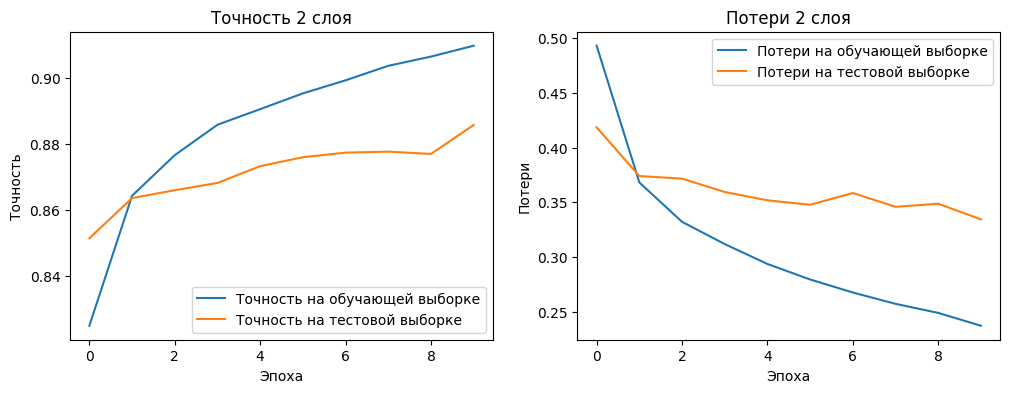

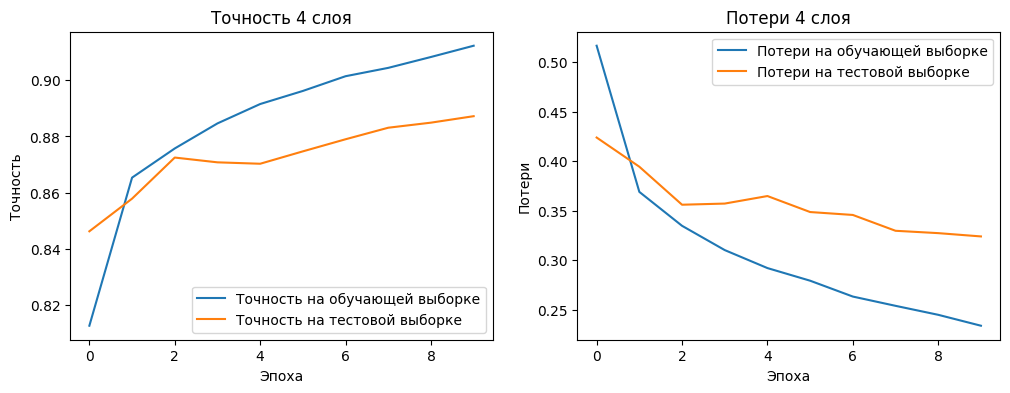

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


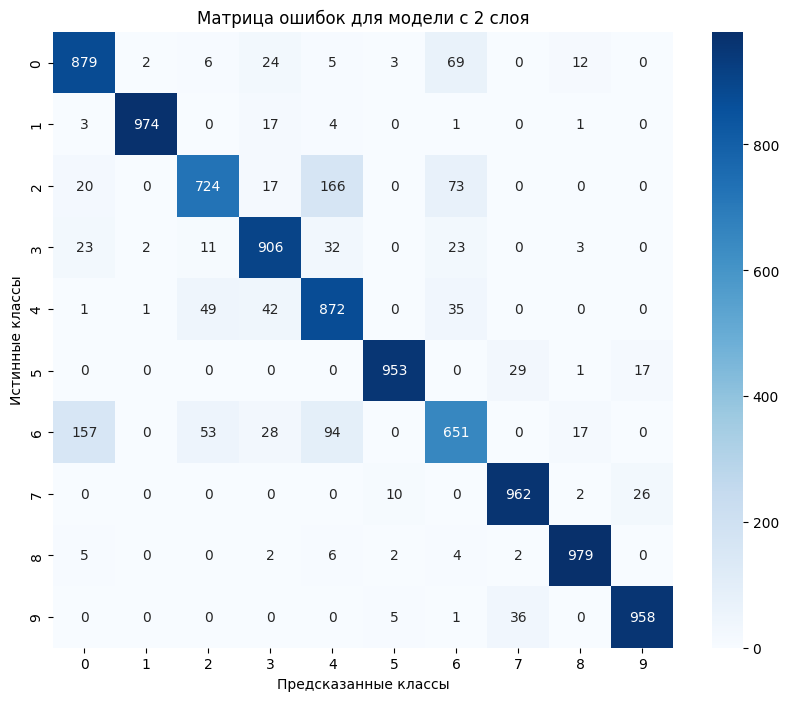

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


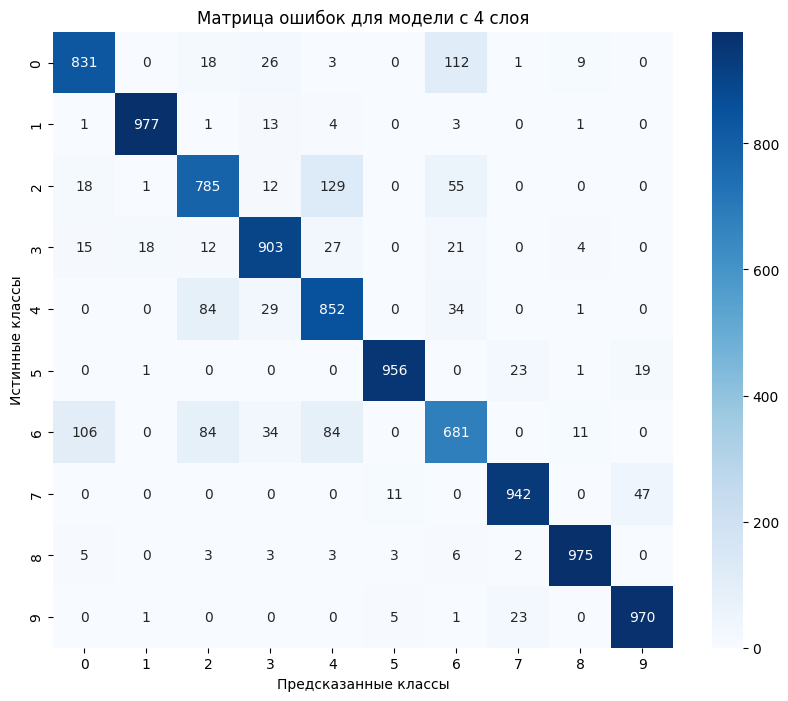

In [ ]:
#
#Задание 9(переделанное)
#
# Импорт необходимых библиотек
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Загрузка и подготовка данных
# Загрузка датасета Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Нормализация данных
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Преобразование меток в категориальные данные
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Создание модели с 2 слоями
def create_model_2_layers():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28*28,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Создание модели с 4 слоями
def create_model_4_layers():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(28*28,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Обучение моделей и измерение времени
def train_model(model, epochs=10):
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    end_time = time.time()
    training_time = end_time - start_time
    return history, training_time

# Обучение модели с 2 слоями
model_2_layers = create_model_2_layers()
history_2_layers, time_2_layers = train_model(model_2_layers)

# Обучение модели с 4 слоями
model_4_layers = create_model_4_layers()
history_4_layers, time_4_layers = train_model(model_4_layers)

# Сравнение времени обучения и точности
print(f"Время обучения модели с 2 слоями: {time_2_layers:.2f} секунд")
print(f"Время обучения модели с 4 слоями: {time_4_layers:.2f} секунд")

# Точность на тестовой выборке
test_loss_2, test_acc_2 = model_2_layers.evaluate(x_test, y_test)
test_loss_4, test_acc_4 = model_4_layers.evaluate(x_test, y_test)

print(f"Точность модели с 2 слоями на тестовой выборке: {test_acc_2:.4f}")
print(f"Точность модели с 4 слоями на тестовой выборке: {test_acc_4:.4f}")

# Визуализация метрик
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
    plt.plot(history.history['val_accuracy'], label='Точность на тестовой выборке')
    plt.title(f'Точность {title}')
    plt.xlabel('Эпоха')
    plt.ylabel('Точность')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Потери на обучающей выборке')
    plt.plot(history.history['val_loss'], label='Потери на тестовой выборке')
    plt.title(f'Потери {title}')
    plt.xlabel('Эпоха')
    plt.ylabel('Потери')
    plt.legend()

    plt.show()

plot_history(history_2_layers, '2 слоя')
plot_history(history_4_layers, '4 слоя')

# Визуализация матрицы ошибок (Confusion Matrix)
def plot_confusion_matrix(model, x_test, y_test, title):
    y_pred = model.predict(x_test)
    y_pred_classes = tf.argmax(y_pred, axis=1).numpy()
    y_true = tf.argmax(y_test, axis=1).numpy()

    cm = confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Матрица ошибок для модели с {title}')
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
    plt.show()

plot_confusion_matrix(model_2_layers, x_test, y_test, '2 слоя')
plot_confusion_matrix(model_4_layers, x_test, y_test, '4 слоя')